#### Practice Project - 7
## Big Data Mart Sales Problem

   #### Problem Statement:
        
        The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

        Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

        The dataset includes two files:

        - bigdatamart_Train.csv: Use this file for the model building purpose. 

        - bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

        Note: You can find the dataset in the link below.



In [916]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV


In [917]:
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')

In [918]:
train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [919]:
for i in train.columns:
        print(train[i].value_counts())

FDG33    10
FDW13    10
FDX31     9
FDW26     9
FDD38     9
         ..
FDQ60     1
FDE52     1
FDO33     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

### **OBSERVATIONS**:
        ==> ITem Fat content Has similar Category or repeated category low_ Fat / LF/ low fat all are same category

In [920]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [921]:
train[train.duplicated()]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

#### **OBSERVATION**: 
        -----No duplicate Data-----

<AxesSubplot:>

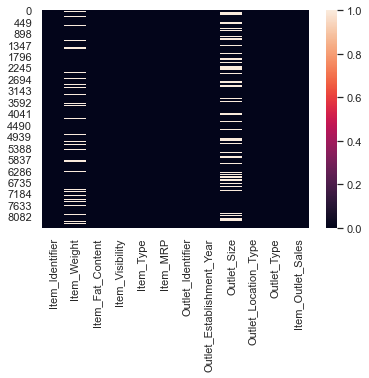

In [922]:
sb.heatmap(train.isnull())

In [923]:
(train.isnull()).sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [924]:
(test.isnull()).sum(axis=0)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [925]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### EDA

In [926]:
category_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
                 'Outlet_Size','Outlet_Location_Type','Outlet_Type' ]
continous_cols =['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

##### VISUALIZING CONTINOUS FEATURES

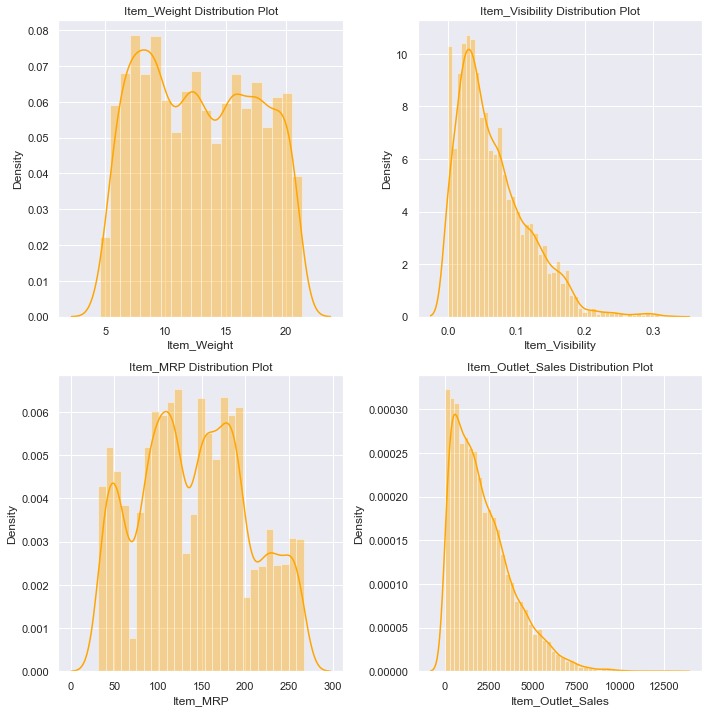

In [927]:
c = 1
plt.figure(figsize=(10,10))
for i in continous_cols:
    
    plt.subplot(2,2,c)
    c = c+1
    sb.distplot(train[i],color='orange')
    plt.title(i+' Distribution Plot')
    plt.tight_layout()

#### OBSERVATIONS:
        ---> ITEM_outlet_Sales is Left skewed with wide spread of Data.
        ---> Item_Visibility is left Skewed.

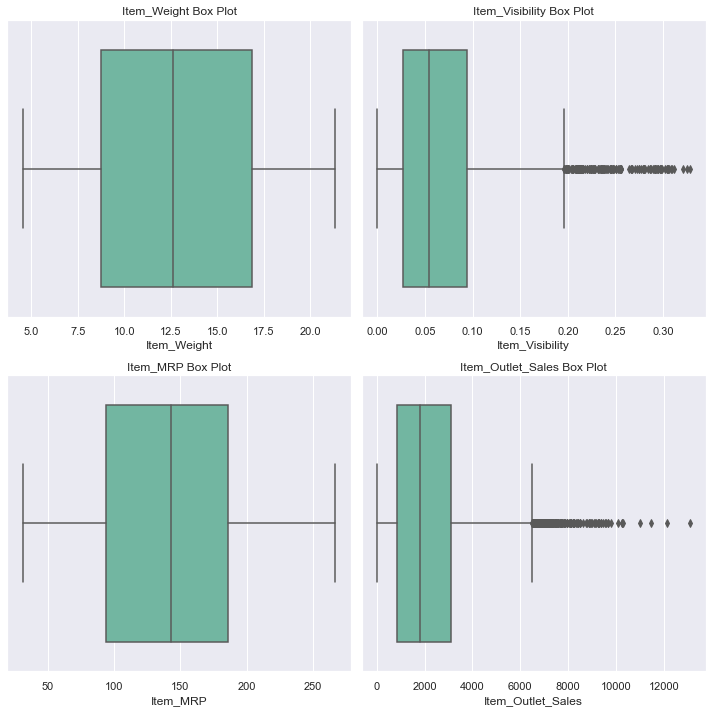

In [928]:
c = 1
plt.figure(figsize=(10,10))
for i in continous_cols:
    
    plt.subplot(2,2,c)
    c = c+1
    sb.boxplot(train[i],palette='Set2')
    plt.title(i+' Box Plot')
    plt.tight_layout()

#### OBSERVATION:
    - ITem_Visibility and Target Variable (outlet_sales ) have outliers.

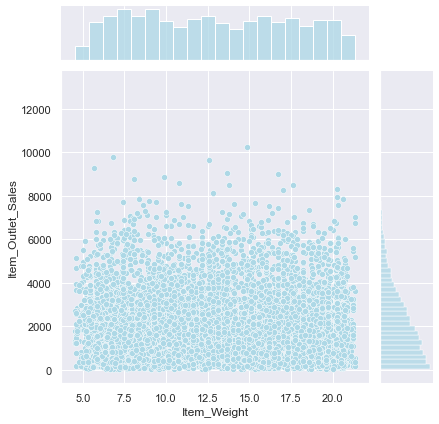

In [929]:
sb.jointplot(train['Item_Weight'],train['Item_Outlet_Sales'],color='lightblue')

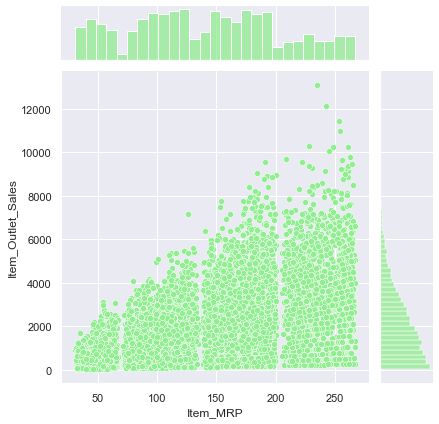

In [930]:
sb.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],color='lightgreen')

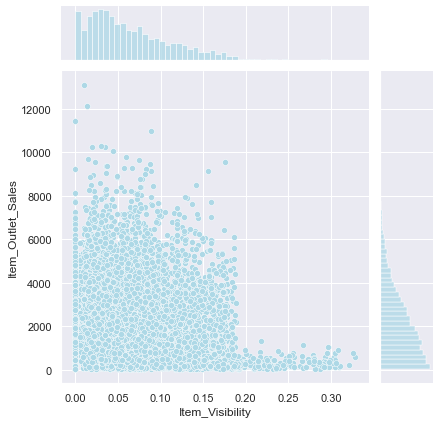

In [931]:
sb.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],color='lightblue')

#### OBSERVATIONS : 
    -  For Higher Value of visibility more than > 0.19, ITem Outlet Sales are Constantly LOwest.
    - ITem_Weight . out-sales do not show much correlation
    

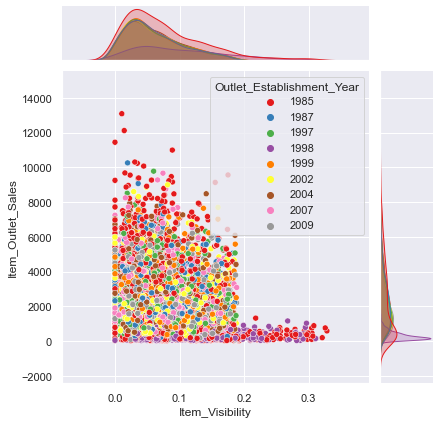

In [932]:
sb.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],hue=train['Outlet_Establishment_Year'],palette='Set1')

#### OBSERVATIONS:
    -- High visibility Of Item HAs lowest Item_outlet Sales in the Year of 1985/ 1998. 
    -- Highest Outlet Sales was in the Year of 1985 was low value of Visibility.
    

<Figure size 432x288 with 0 Axes>

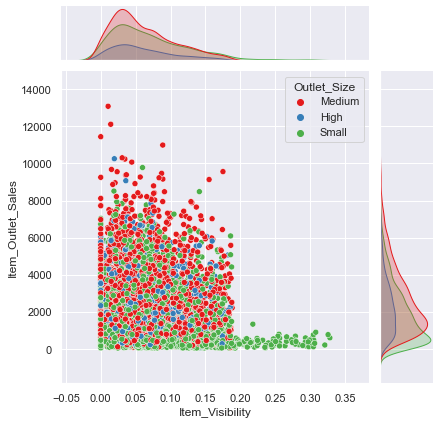

In [933]:
plt.figure()
sb.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'],palette='Set1')


<Figure size 432x288 with 0 Axes>

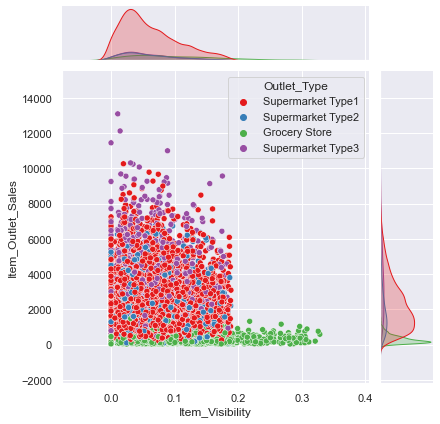

In [934]:
plt.figure()
sb.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],hue=train['Outlet_Type'],palette='Set1')


<Figure size 432x288 with 0 Axes>

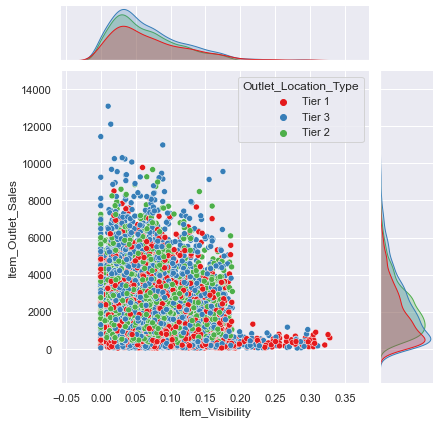

In [935]:
plt.figure()
sb.jointplot(train['Item_Visibility'],train['Item_Outlet_Sales'],hue=train['Outlet_Location_Type'],palette='Set1')


#### OBSERVATIONS :
    ---->  Visibility is Higher for small Size Outler / Oultet Sales is Higher for medium Size outlets. 
    ----> Visibility high and Low Outlet Sales is mainly comprises of grocery stores, Visibility Low -> high, outlet Sales Low
    ----> Super market Type 3/2 seems to have highest Outlet  Sales .
    
    ---> Visibility of Tier 2 does not exceed 0.19 , >.19 
    --->  WE Observe , with Visibility >.19, High Probability of a product sale to be Low.
    
    
    
### TO Visualize more, Let see barpplots for the Same to get a definite idea.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Visibility'>

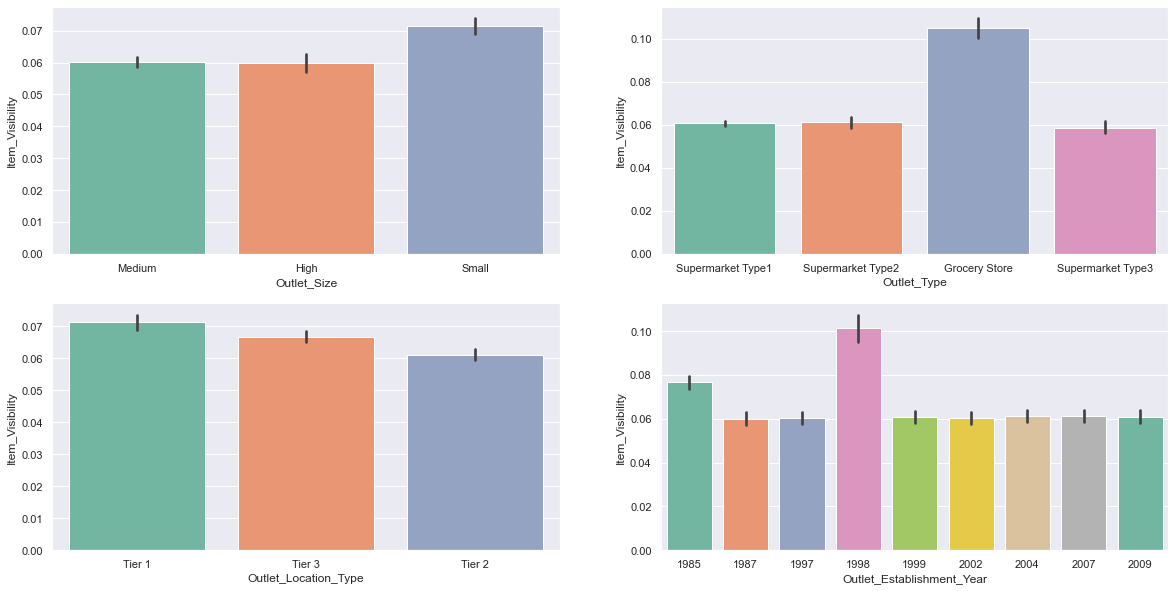

In [936]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sb.barplot(train['Outlet_Size'],train['Item_Visibility'],palette='Set2')
plt.subplot(2,2,2)
sb.barplot(train['Outlet_Type'],train['Item_Visibility'],palette='Set2')
plt.subplot(2,2,3)
sb.barplot(train['Outlet_Location_Type'],train['Item_Visibility'],palette='Set2')
plt.subplot(2,2,4)
sb.barplot(train['Outlet_Establishment_Year'],train['Item_Visibility'],palette='Set2')

#### **OBSERVATIONS** : 
        --->  Small Outlet size avg value for visibility is Highest  than rest of the Outlet and in actual, Small outlet SIZE Only Exceed visibility > .19 with Very Low Outlet Sales.
   **WE CAN SAY IF A PRODUCT TYPE HAS A OUTLET SIZE AS SMALL AND ITS VISIBILITY > .19 , ITS LIKELY THAT ITS OUTLET SALES WOULD BE VERY LOW.**
   
       ---> Grocery Store Has highest Avgerage value of Visibility than out outlet_types, WE CAN SAY
   **PRODUCT WITH HIGH VISIBILITY >19 are more likely in grocery stores and MOST LIKELY TO HAVE LoW OUTLET SALES>**
   
       ----> PAST INFORmation about the Yearly outlet  tells us only in 1998,1985, stores has visibility higher than > .19.
   **AS all this observation of high Visibility, low outlet sales belong to establishment_year of 1998,1985 Data of supermarkets, WE can Say More Established small outlet size supermarkets have high visibility as small no of products in store and low outlet Sales  **
   
   
 **Grocery Store  without the visibility factor also, always tend to have low Outlet Sales**
   

<Figure size 1440x720 with 0 Axes>

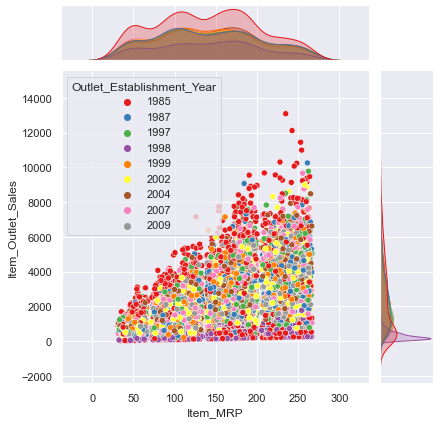

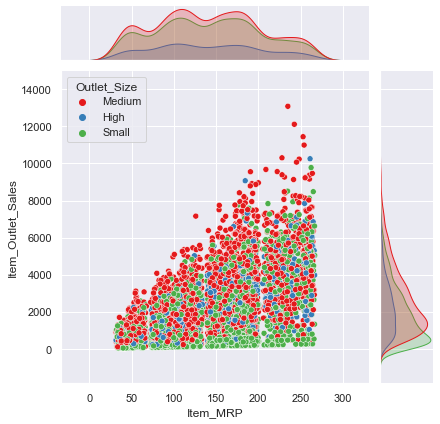

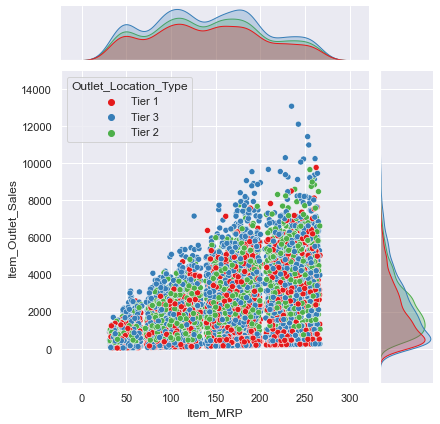

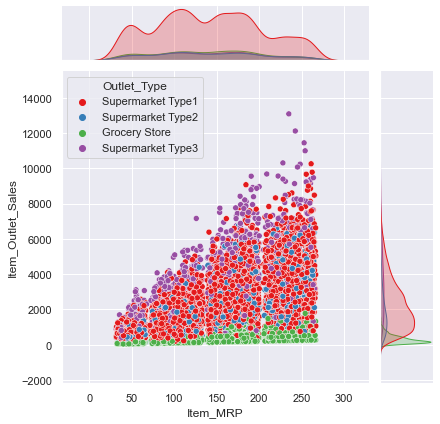

In [937]:

plt.figure(figsize=(20,10))
sb.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],hue=train['Outlet_Establishment_Year'],palette='Set1')

sb.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'],palette='Set1')

sb.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],hue=train['Outlet_Location_Type'],palette='Set1')

sb.jointplot(train['Item_MRP'],train['Item_Outlet_Sales'],hue=train['Outlet_Type'],palette='Set1')

#### OBSERVATIONS:
        --> 1985 Established Outlet have most HIgh MRP / High outLET SALEs combination
        --> Small OUTLETS have equal spread for mrp range but outlet sales min ranges between 0 to higer, Whereas Medium Outlet Range is obsered to haves High Outlet Sales more.
        --> Tier 3 location Type with all kind of mrp Range tend to have High outlet Sales.
        --> Supermarket type 1 has a wide spread of outlet spread, wgere as spermarket has spread over highest outlet sales in all mrp ranges.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

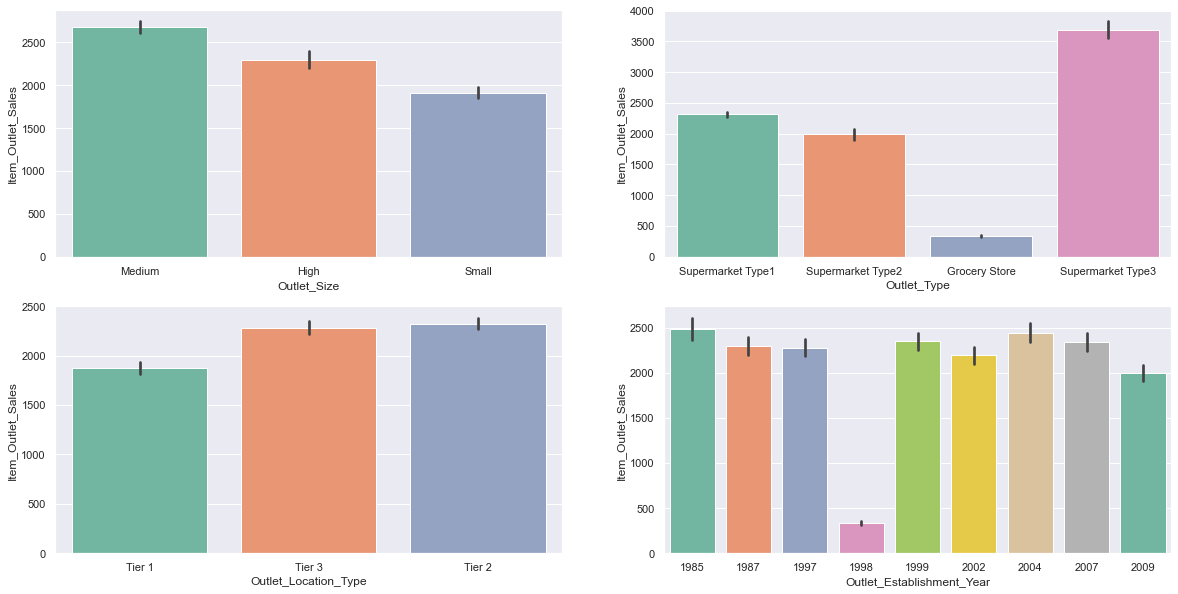

In [938]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sb.barplot(train['Outlet_Size'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,2)
sb.barplot(train['Outlet_Type'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,3)
sb.barplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,4)
sb.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'],palette='Set2')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

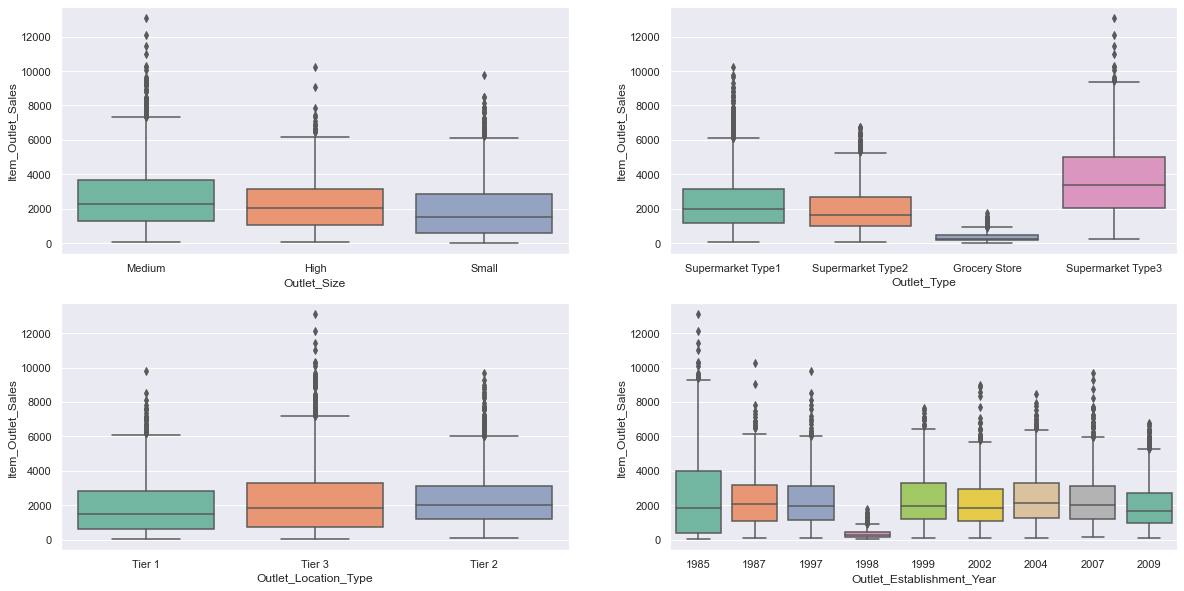

In [939]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sb.boxplot(train['Outlet_Size'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,2)
sb.boxplot(train['Outlet_Type'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,3)
sb.boxplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'],palette='Set2')
plt.subplot(2,2,4)
sb.boxplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'],palette='Set2')

#### OBSERVATIONS :
    -- Medium Size OUtlets have Highest Avg Outlet Sales.
    -- Super market 3 has highest outlet sales as seen in all the plots, Super market 1 has next Higest outlet Sales.
    -- Grocery Stores  can be considered to have LOW OUTLET SALES.
    -- 1998 Establsihed has lowest  outlet sales
    all location types/SIZE have sME RANGE OUTLET SALES.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

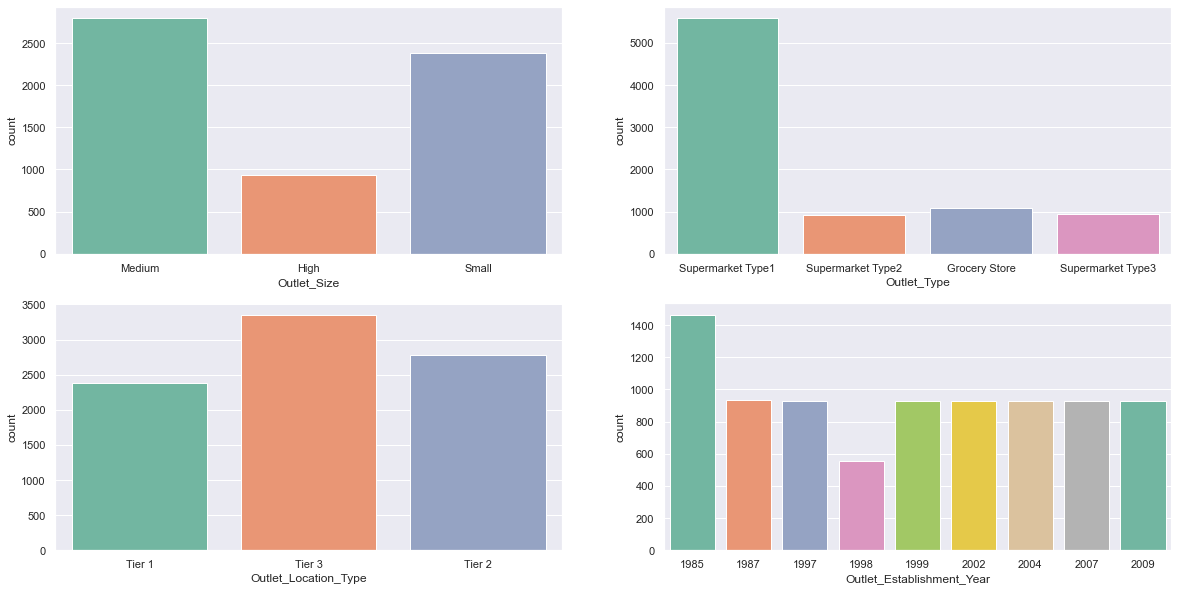

In [940]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sb.countplot(train['Outlet_Size'],palette='Set2')
plt.subplot(2,2,2)
sb.countplot(train['Outlet_Type'],palette='Set2')
plt.subplot(2,2,3)
sb.countplot(train['Outlet_Location_Type'],palette='Set2')
plt.subplot(2,2,4)
sb.countplot(train['Outlet_Establishment_Year'],palette='Set2')

#### OBSERVATIONS:
    - MEdium Outlet_Size is observed to have Highest Avg Sales of Outlet.
    - Supermartket 1 has highest no of stores and sales ranging from high to medium to Low giving highest Average Outlet Sales.
    - Tier 3 / 1985 Establsihment Year has highest average High salesfor Outlet.

In [941]:
tier3 = train[train['Outlet_Location_Type']=='Tier 3']
tier2 = train[train['Outlet_Location_Type']=='Tier 2']
tier1 = train[train['Outlet_Location_Type']=='Tier 1']

In [942]:
tier2.tail(20)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8478           FDX34        6.195          Low Fat         0.071972   
8481           FDT56       16.000          Regular         0.115827   
8483           DRI11        8.260          Low Fat         0.034474   
8493           FDP21        7.420          Regular         0.025886   
8494           NCI54       15.200          Low Fat         0.000000   
8495           FDE22        9.695          Low Fat         0.029567   
8496           FDJ57        7.420          Regular         0.021696   
8497           FDT08       13.650          Low Fat         0.049209   
8499           NCK53       11.600          Low Fat         0.037574   
8500           NCQ42       20.350          Low Fat         0.000000   
8501           FDW21        5.340          Regular         0.005998   
8502           NCH43        8.420          Low Fat         0.070712   
8503           FDQ44       20.500          Low Fat         0.036133   
8507           FDN28        5.880          Regular         0.030242   
8508           FDW31       11.350          Regular         0.043246   
8510           FDN58       13.800          Regular         0.056862   
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   

                  Item_Type  Item_MRP Outlet_Identifier  \
8478            Snack Foods  121.3098            OUT035   
8481  Fruits and Vegetables   56.0246            OUT045   
8483            Hard Drinks  117.0834            OUT045   
8493            Snack Foods  189.1872            OUT017   
8494              Household  110.4912            OUT017   
8495            Snack Foods  160.4920            OUT035   
8496                Seafood  185.3582            OUT017   
8497  Fruits and Vegetables  150.0050            OUT035   
8499     Health and Hygiene  100.0042            OUT035   
8500              Household  125.1678            OUT017   
8501            Snack Foods  100.4358            OUT017   
8502              Household  216.4192            OUT045   
8503  Fruits and Vegetables  120.1756            OUT035   
8507           Frozen Foods  101.7990            OUT035   
8508  Fruits and Vegetables  199.4742            OUT045   
8510            Snack Foods  231.5984            OUT035   
8513                   Meat   99.9042            OUT035   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8478                       2004       Small               Tier 2   
8481                       2002         NaN               Tier 2   
8483                       2002         NaN               Tier 2   
8493                       2007         NaN               Tier 2   
8494                       2007         NaN               Tier 2   
8495                       2004       Small               Tier 2   
8496                       2007         NaN               Tier 2   
8497                       2004       Small               Tier 2   
8499                       2004       Small               Tier 2   
8500                       2007         NaN               Tier 2   
8501                       2007         NaN               Tier 2   
8502                       2002         NaN               Tier 2   
8503                       2004       Small               Tier 2   
8507                       2004       Small               Tier 2   
8508                       2002         NaN               Tier 2   
8510                       2004       Small               Tier 2   
8513                       2004       Small               Tier 2   
8514                       2002         NaN      

#### OBSERVE ALL TIER 1 OUTLET TYPES BELONG TO SUPER MARKET 1  and some to Grocery Store

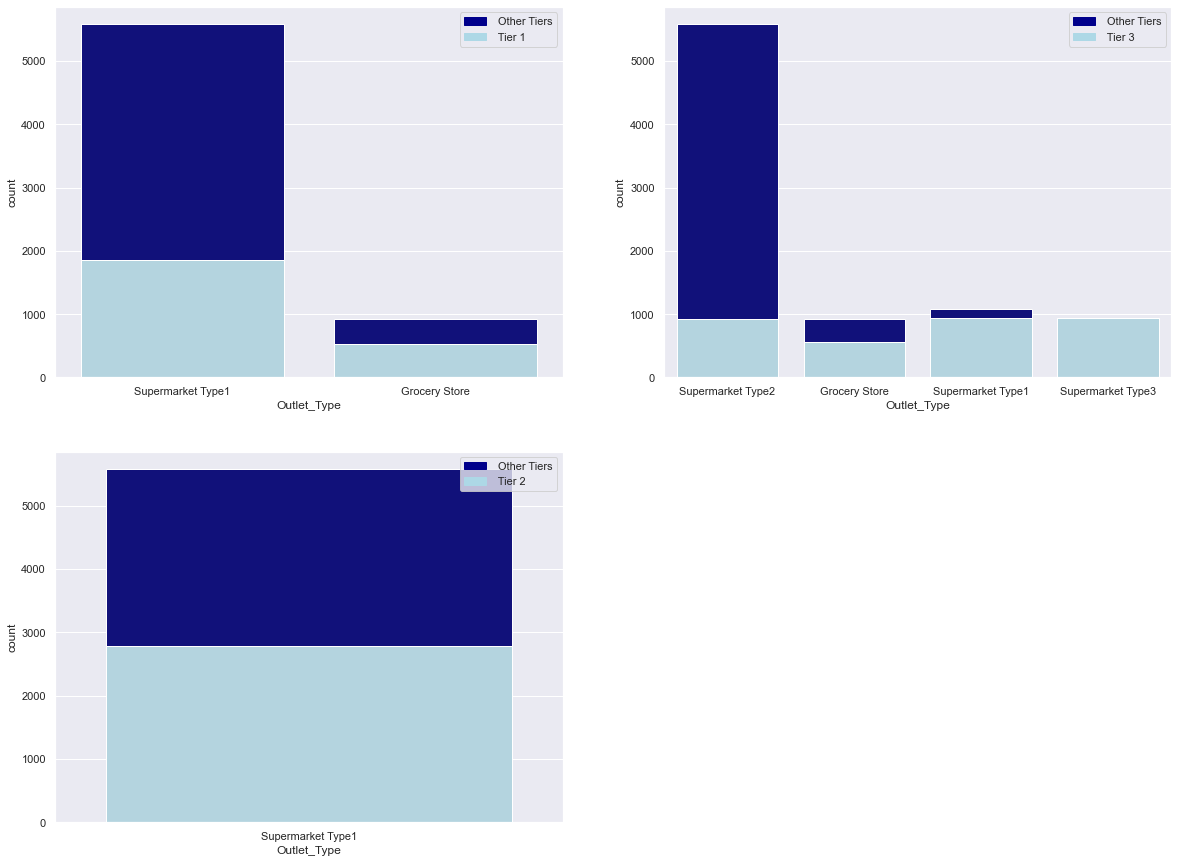

In [943]:
import matplotlib.patches as mpatches
sb.set(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
outlet_type = sb.countplot(train['Outlet_Type'],color='darkblue')
t1 =  sb.countplot('Outlet_Type',data=tier1,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 1')

plt.legend(handles=[top_bar2,top_bar1])



plt.subplot(2,2,2)
outlet_type = sb.countplot(train['Outlet_Type'],color='darkblue')
t1 =  sb.countplot('Outlet_Type',data=tier3,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 3')

plt.legend(handles=[top_bar2,top_bar1])


plt.subplot(2,2,3)
outlet_type = sb.countplot(train['Outlet_Type'],color='darkblue')
t1 =  sb.countplot('Outlet_Type',data=tier2,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 2')

plt.legend(handles=[top_bar2,top_bar1])


   #### Observe
   
   --> Superrmarket type 1 all the tiers , consisting on highest level with Tier2, Tier2 only belong to Supermakret type 1.
   --> Tier 1 / Tier 3 has equal 49:51 ratio for Grocery Stores. Tier 1 also belong to supermarket type 1 .
   --> Tier 3 belong to all the outley_types

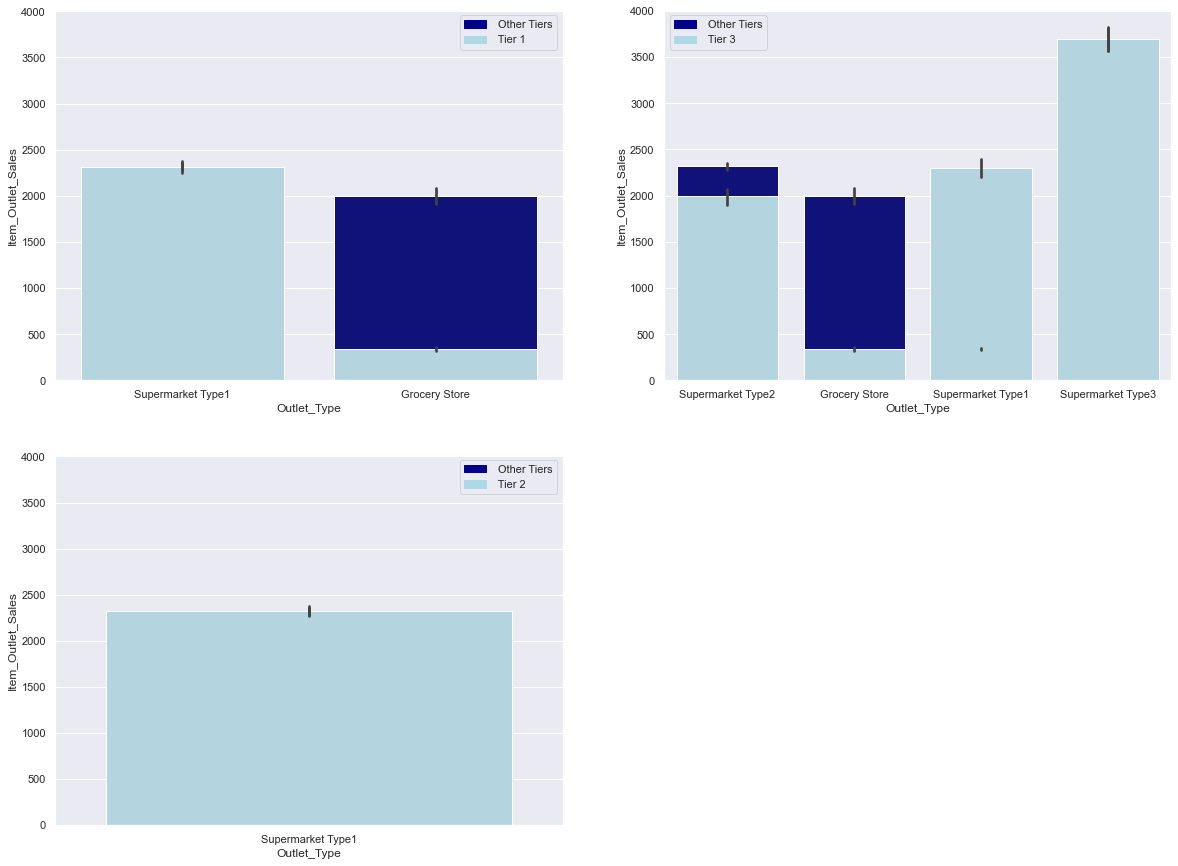

In [944]:
import matplotlib.patches as mpatches
sb.set(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
outlet_type = sb.barplot(train['Outlet_Type'],train['Item_Outlet_Sales'],color='darkblue')
t1 =  sb.barplot('Outlet_Type','Item_Outlet_Sales',data=tier1,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 1')

plt.legend(handles=[top_bar2,top_bar1])



plt.subplot(2,2,2)
outlet_type = sb.barplot(train['Outlet_Type'],train['Item_Outlet_Sales'],color='darkblue')
t1 =  sb.barplot('Outlet_Type','Item_Outlet_Sales',data=tier3,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 3')

plt.legend(handles=[top_bar2,top_bar1])


plt.subplot(2,2,3)
outlet_type = sb.barplot(train['Outlet_Type'],train['Item_Outlet_Sales'],color='darkblue')
t1 =  sb.barplot('Outlet_Type','Item_Outlet_Sales',data=tier2,color='lightblue')

top_bar2 = mpatches.Patch(color='darkblue', label=' Other Tiers')
top_bar1 = mpatches.Patch(color='lightblue', label=' Tier 2')

plt.legend(handles=[top_bar2,top_bar1])


#### OBSEVATIONS:
        --- >  We have Seen super market 3 has low spread of sales belong to high outlet sales contributed by Tier 3 outlet_location types.
        ----> Supermarket type 1 has wide spread of outlet Sales contributed by all the Tiers equally.
        

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Weight'>

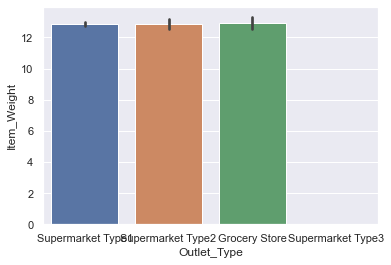

In [945]:
sb.barplot(train['Outlet_Type'],train['Item_Weight'])

In [946]:
train.groupby('Outlet_Type').mean()

Item_Weight  Item_Visibility    Item_MRP  \
Outlet_Type                                                   
Grocery Store        12.913153         0.104862  140.294688   
Supermarket Type1    12.849509         0.060723  141.213894   
Supermarket Type2    12.873346         0.061014  141.678634   
Supermarket Type3          NaN         0.058615  139.801791   

                   Outlet_Establishment_Year  Item_Outlet_Sales  
Outlet_Type                                                      
Grocery Store                    1991.662050         339.828500  
Supermarket Type1                1999.322933        2316.181148  
Supermarket Type2                2009.000000        1995.498739  
Supermarket Type3                1985.000000        3694.038558

In [947]:
train[(train['Item_Weight'].isnull()) & (train['Outlet_Type']=='Supermarket Type3')] 

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
36             FDV20          NaN          Regular         0.059512   
38             FDX10          NaN          Regular         0.123111   
...              ...          ...              ...              ...   
8472           NCS41          NaN          Low Fat         0.053185   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
36    Fruits and Vegetables  128.0678            OUT027   
38              Snack Foods   36.9874            OUT027   
...                     ...       ...               ...   
8472     Health and Hygiene  182.9608            OUT027   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
36                         1985      Medium               Tier 3   
38                         1985      Medium               Tier 3   
...                         ...         ...                  ...   
8472                       1985      Medium               Tier 3   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
36    Supermarket Type3          2797.6916  
38    Supermarket Type3           388.1614  
...                 ...                ...  
8472  Supermarket Type3          1653.8472  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8504  Supermarket Type3          4138.6128  

[935 rows x 12 columns]

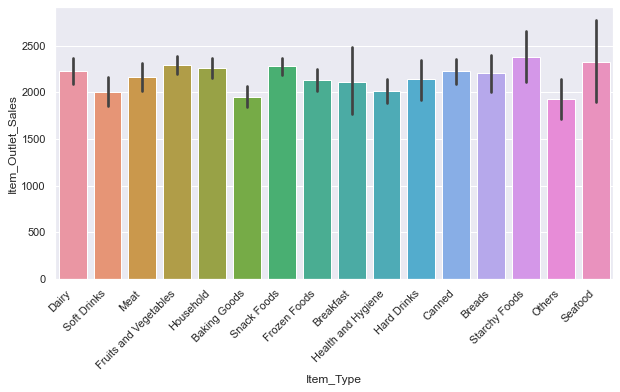

In [948]:
plt.figure(figsize=(10,5))
sb.barplot('Item_Type','Item_Outlet_Sales',data=train)
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

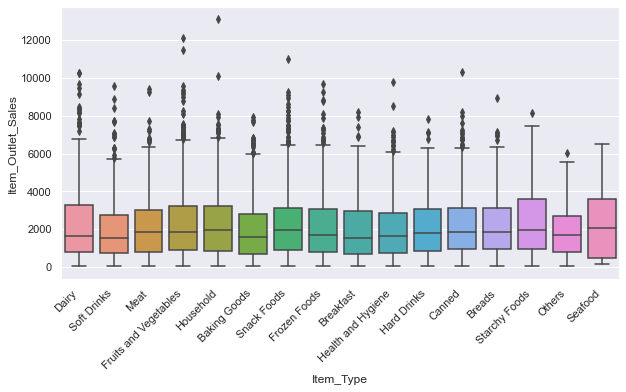

In [949]:
plt.figure(figsize=(10,5))
sb.boxplot('Item_Type','Item_Outlet_Sales',data=train)
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATION:
       --- Seafood/ Dairy/ Starchy food has a lillte edge over other product types.

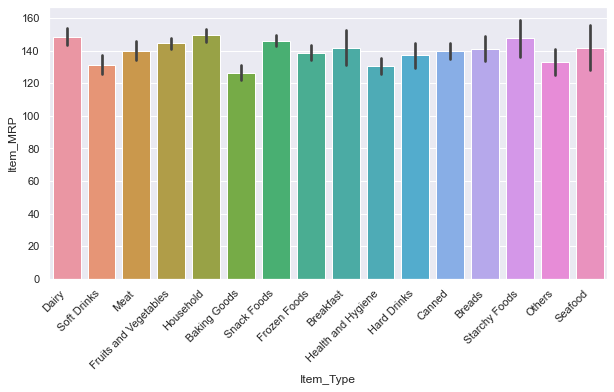

In [950]:
plt.figure(figsize=(10,5))
sb.barplot('Item_Type','Item_MRP',data=train)
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

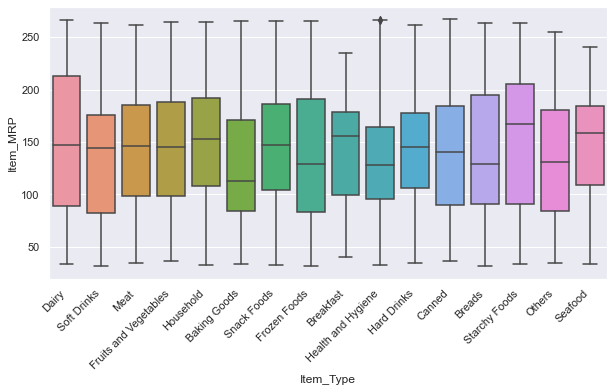

In [951]:
plt.figure(figsize=(10,5))
sb.boxplot('Item_Type','Item_MRP',data=train)
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATION
    Dairy/ Starchy food has more edge in MRP Prices w.r.t to ther products, 

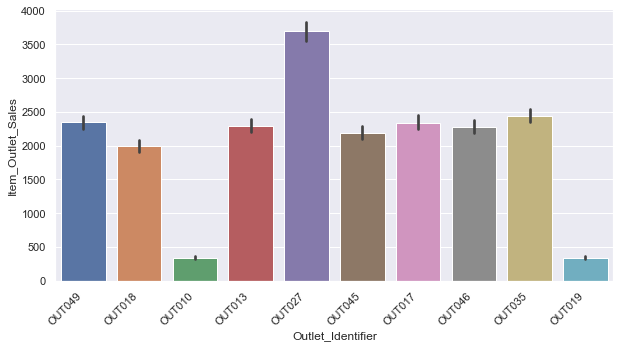

In [952]:
#sb.barplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.figure(figsize=(10,5))
sb.barplot('Outlet_Identifier','Item_Outlet_Sales',data=train)
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

([<matplotlib.axis.XTick at 0x13f527f0c70>,
 [Text(0, 0, '049'),
  Text(1, 0, '018'),
  Text(2, 0, '010'),
  Text(3, 0, '013'),
  Text(4, 0, '027'),
  Text(5, 0, '045'),
  Text(6, 0, '017'),
  Text(7, 0, '046'),
  Text(8, 0, '035'),
  Text(9, 0, '019')])

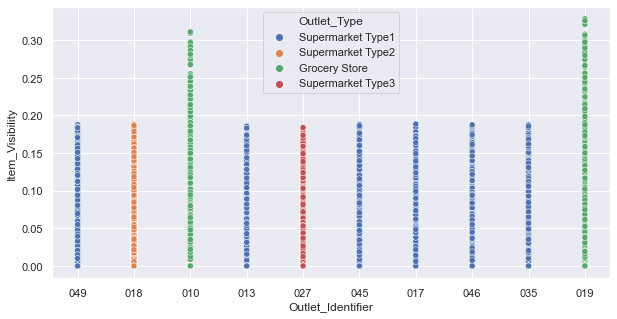

In [953]:
plt.figure(figsize=(10,5))
sb.scatterplot(train['Outlet_Identifier'],train['Item_Visibility'],
               hue=train['Outlet_Type'])
plt.xticks(range(0,10),['049','018','010','013','027','045','017','046','035','019'])

#### OBSERVATIONS
    - OUTLET IDENTIFIER with 010, 019 has the lowest outlet sales and in turn has also has > .19 visibility.
    - Outlet Identifier 027 has Highest outlet Sales.
    
    
  ##### Checking the probability of lowest outlet sales bieng grocery stores , and highest bieng the supe market type 1
    
##### Checknig the relationship with outlet Number and outlet_Size/ Location_type/ visibility

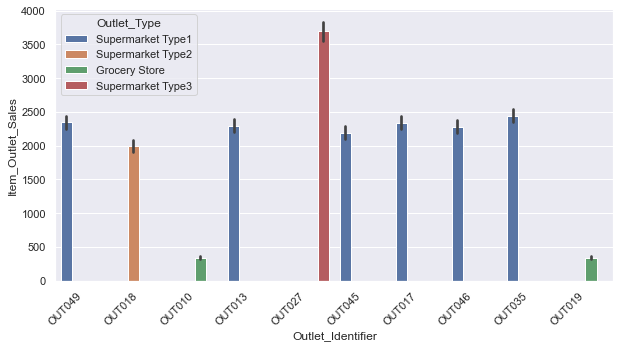

In [954]:
plt.figure(figsize=(10,5))
sb.barplot('Outlet_Identifier','Item_Outlet_Sales',data=train,hue='Outlet_Type')
plt.xticks( rotation=45, horizontalalignment='right')
plt.show()

#### OBSERVATIONS:
    - Highest Outlet Sales outlet 027 belongs to super market 1/3. 
    - lowest sales of oultet is contributed by grocery stores.
   
  *Item belong to  outlet 27 has high probabilty to have high outlet Sales*
  
  
  *Items belonging to  018,019, has high probabilty to have low_Item_outlet Sales*
   

#### DATA CLEANING
        -- Fixing Item fat Content , similar categroy names, low fat/ Low fat/ LF AND REGULAR/reg

In [955]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [956]:
def item_fat_content_type(val):
    value = ''
    if( val == 'low fat') | ( val == 'regular'):
        value=  val
    if val == 'lf':
        value= 'low fat'
    if val == 'reg':
        value= 'regular'
    
    return value
    
     

In [957]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].apply(lambda x: item_fat_content_type(x.lower()))
test['Item_Fat_Content'] = test['Item_Fat_Content'].apply(lambda x: item_fat_content_type(x.lower()))


In [958]:
train['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [959]:
test['Item_Fat_Content'].value_counts()

low fat    3668
regular    2013
Name: Item_Fat_Content, dtype: int64

##### FILLING NAN VALUES OF OUTLET_SIZE with MODE, item _wieght with mean vlaue

<AxesSubplot:>

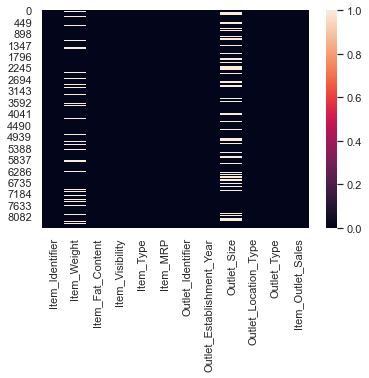

In [960]:
sb.heatmap(train.isnull())

In [961]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [962]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [963]:
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [964]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

<AxesSubplot:>

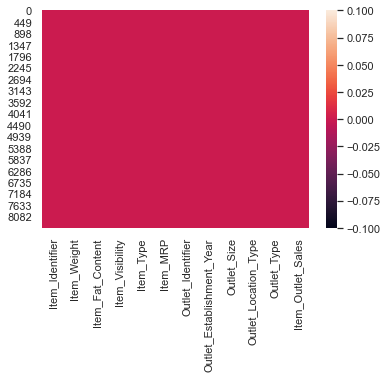

In [965]:
sb.heatmap(train.isnull())

In [966]:
from sklearn.preprocessing import LabelEncoder

In [967]:
category_cols = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
                 'Outlet_Size','Outlet_Location_Type','Outlet_Type' ]
continous_cols =['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
encoder = LabelEncoder()

In [968]:
for i in category_cols:
    train[i] = encoder.fit_transform(train[i])
    

In [969]:
for i in category_cols[1:]:
    test[i] = encoder.fit_transform(test[i])
    

In [970]:
train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                          4   
1            14   48.2692                  3                          8   
2            10  141.6180                  9                          4   
3             6  182.0950                  0                          3   
4             9   53.8614                  1                          1   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                          1   
8519          0  108.1570                  7                          5   
8520          8   85.1224                  6                          6   
8521         13  103.1332                  3                          8   
8522         14   75.4670                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8523 rows x 12 columns]

In [971]:
train['Item_Identifier'].value_counts()

413     10
1077    10
702      9
390      9
1454     9
        ..
351      1
46       1
1200     1
251      1
713      1
Name: Item_Identifier, Length: 1559, dtype: int64

In [972]:
#index = pd.MultiIndex.from_tuples(train, names=["Outlet_Identifier", "Item_Identifier"])


In [973]:
#train_multi_level =  pd.DataFrame(train, index=['Item_Fat_Content','Item_Type',
 #                                       'Outlet_Establishment_Year','Item_Weight',
 #                                       'Item_Visibility','Item_MRP','Item_Outlet_Sales',
  #               'Outlet_Size','Outlet_Location_Type','Outlet_Type' ], columns=index)


In [974]:
train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                          4   
1            14   48.2692                  3                          8   
2            10  141.6180                  9                          4   
3             6  182.0950                  0                          3   
4             9   53.8614                  1                          1   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                          1   
8519          0  108.1570                  7                          5   
8520          8   85.1224                  6                          6   
8521         13  103.1332                  3                          8   
8522         14   75.4670                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8523 rows x 12 columns]

<AxesSubplot:>

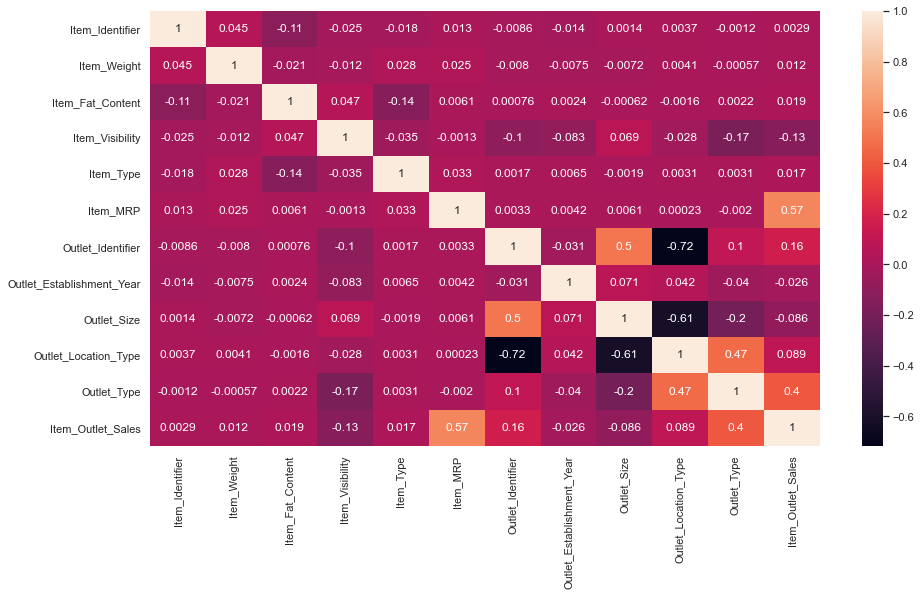

In [975]:
plt.figure(figsize=(15,8))
sb.heatmap(train.corr(),annot=True)

##### OBSERVATIONS

    - Target Variable ITEM_Outlet Sales has high Correlation with ITEM_MRP, OutLet_type(Supermarket types/ grocery.
    - Moderate Correlation of target Variable with outlet_Size/ Visibility/  Negatively and positively with Outlet_identifier.
    
    - WE can drop Item_Identifier as we can enough information about the ITem like item price, visibility,its outlet.
    
    - Multicollinearity between Outlet Size / Outlet_location Type as we saw in EDA part.
    - Item_Identifier has high corelation with Outlet_location Type, we saw that in EDA.
   

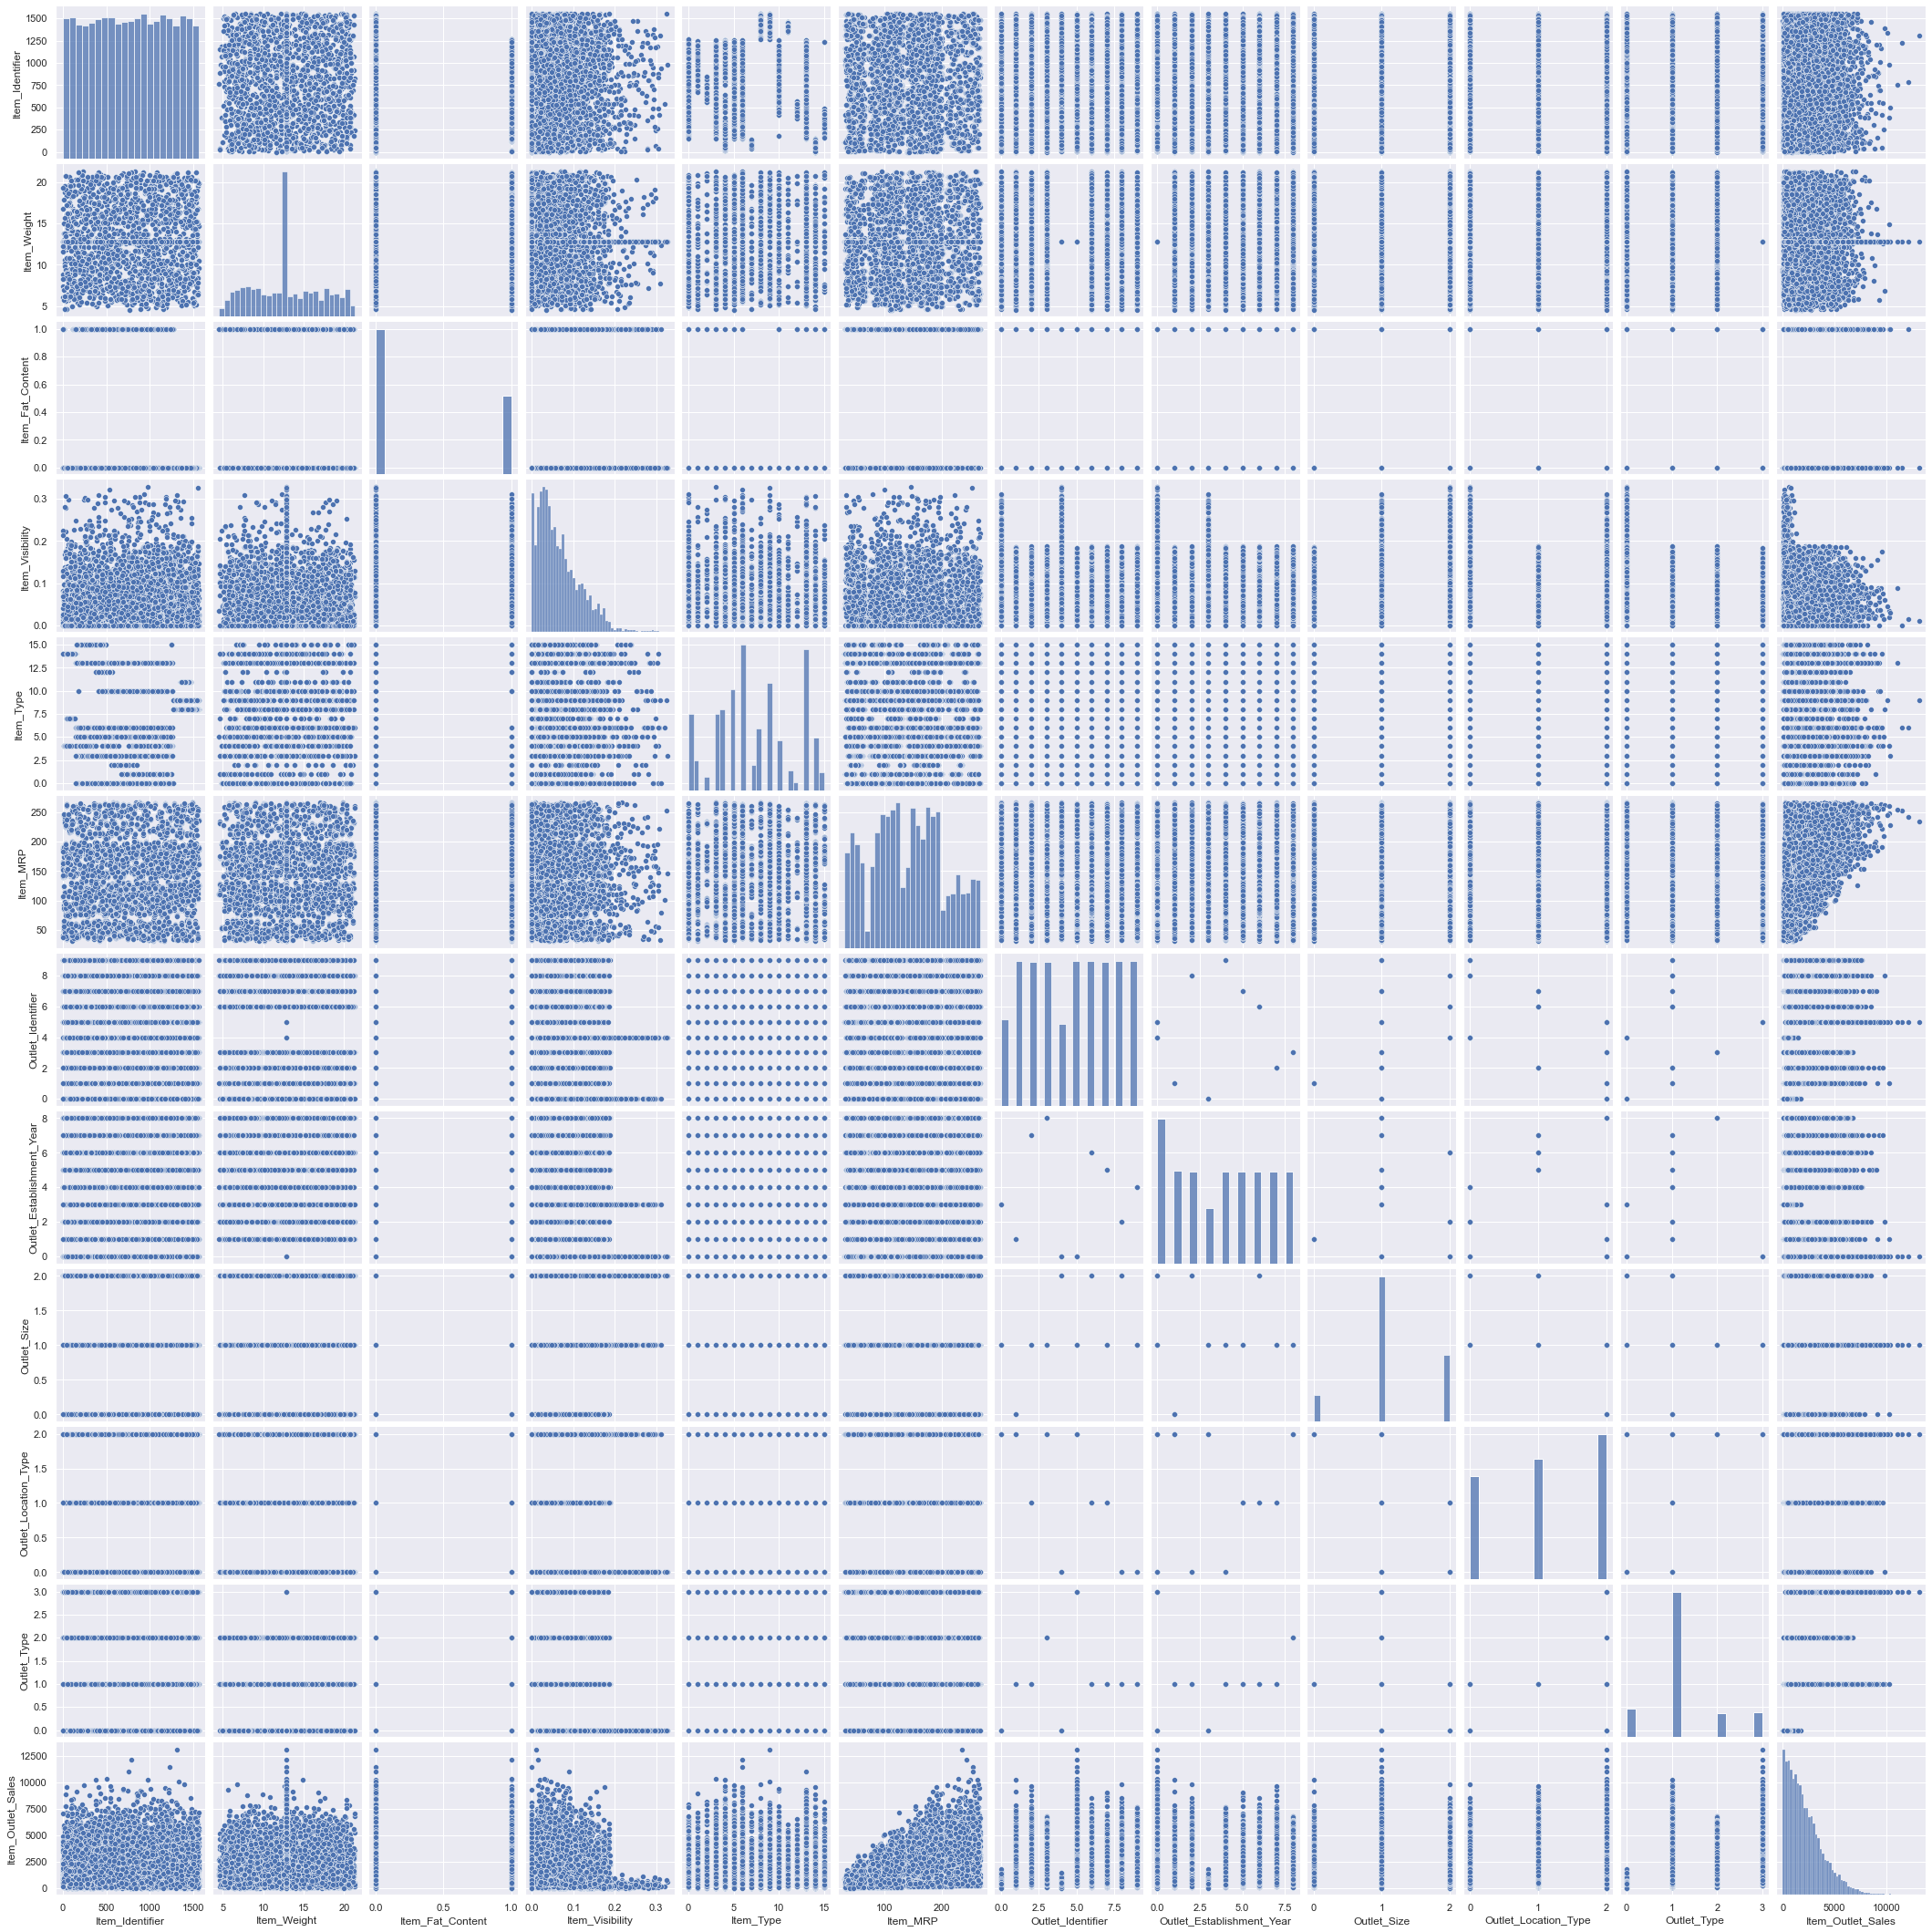

In [976]:
sb.pairplot(train)

In [977]:
train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                          4   
1            14   48.2692                  3                          8   
2            10  141.6180                  9                          4   
3             6  182.0950                  0                          3   
4             9   53.8614                  1                          1   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                          1   
8519          0  108.1570                  7                          5   
8520          8   85.1224                  6                          6   
8521         13  103.1332                  3                          8   
8522         14   75.4670                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8523 rows x 12 columns]

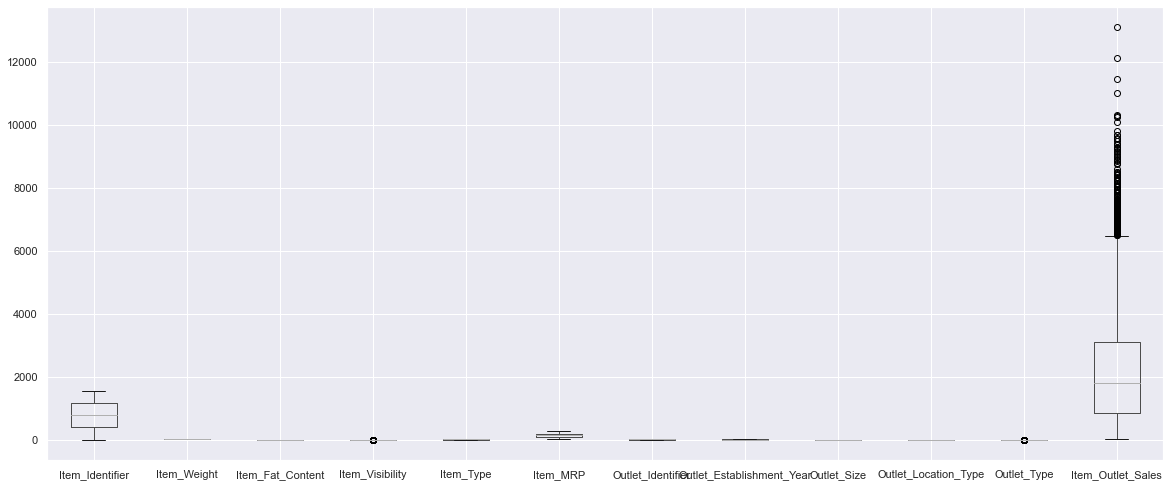

In [978]:
train.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=.25)
plt.show()

####  DATA PREPORCESSING: TREATING OUTLIERS
    - Item _Visibility has some Outliers with SCORE METHOD

In [979]:
from scipy.stats import zscore

In [980]:
scores = np.abs(zscore(train))

In [981]:
len(np.where(scores>3)[0])

185

In [982]:
train = train[(scores<3).all(axis=1)]

In [983]:
train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                          4   
1            14   48.2692                  3                          8   
2            10  141.6180                  9                          4   
3             6  182.0950                  0                          3   
4             9   53.8614                  1                          1   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                          1   
8519          0  108.1570                  7                          5   
8520          8   85.1224                  6                          6   
8521         13  103.1332                  3                          8   
8522         14   75.4670                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0               1                     0            1          3735.1380  
1               1                     2            2           443.4228  
2               1                     0            1          2097.2700  
3               1                     2            0           732.3800  
4               0                     2            1           994.7052  
...           ...                   ...          ...                ...  
8518            0                     2            1          2778.3834  
8519            1                     1            1           549.2850  
8520            2                     1            1          1193.1136  
8521            1                     2            2          1845.5976  
8522            2                     0            1           765.6700  

[8338 rows x 12 columns]

In [984]:
item_id = test['Item_Identifier']

In [985]:
train.skew(),test.skew()

(Item_Identifier             -0.007837
 Item_Weight                  0.089291
 Item_Fat_Content             0.620973
 Item_Visibility              0.794272
 Item_Type                    0.098295
 Item_MRP                     0.138990
 Outlet_Identifier           -0.065135
 Outlet_Establishment_Year    0.012512
 Outlet_Size                 -0.087933
 Outlet_Location_Type        -0.202674
 Outlet_Type                  0.956727
 Item_Outlet_Sales            0.878267
 dtype: float64,
 Item_Weight                  0.142813
 Item_Fat_Content             0.609223
 Item_Visibility              1.238312
 Item_Type                    0.096486
 Item_MRP                     0.136182
 Outlet_Identifier           -0.060209
 Outlet_Establishment_Year    0.034635
 Outlet_Size                 -0.087108
 Outlet_Location_Type        -0.209049
 Outlet_Type                  0.927446
 dtype: float64)

In [986]:
from sklearn.preprocessing import PowerTransformer

In [987]:

power = PowerTransformer()

In [988]:
y = train['Item_Outlet_Sales']

In [989]:
train1 = train.drop('Item_Outlet_Sales',axis=1)

In [990]:
train1 

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9                          4   
1            14   48.2692                  3                          8   
2            10  141.6180                  9                          4   
3             6  182.0950                  0                          3   
4             9   53.8614                  1                          1   
...         ...       ...                ...                        ...   
8518         13  214.5218                  1                          1   
8519          0  108.1570                  7                          5   
8520          8   85.1224                  6                          6   
8521         13  103.1332                  3                          8   
8522         14   75.4670                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     2            2  
2               1                     0            1  
3               1                     2            0  
4               0                     2            1  
...           ...                   ...          ...  
8518            0                     2            1  
8519            1                     1            1  
8520            2                     1            1  
8521            1                     2            2  
8522            2                     0            1  

[8338 rows x 11 columns]

In [991]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [992]:
train1[['Item_Visibility','Item_MRP','Item_Weight']] = power.fit_transform(train1[['Item_Visibility','Item_MRP','Item_Weight'] ])

In [993]:
test[['Item_Visibility','Item_MRP','Item_Weight']] = power.fit_transform(test[['Item_Visibility','Item_MRP','Item_Weight'] ])

In [994]:
train1.skew()

Item_Identifier             -0.007837
Item_Weight                 -0.069766
Item_Fat_Content             0.620973
Item_Visibility              0.115911
Item_Type                    0.098295
Item_MRP                    -0.112576
Outlet_Identifier           -0.065135
Outlet_Establishment_Year    0.012512
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
dtype: float64

In [995]:
test.skew()

Item_Weight                 -0.060915
Item_Fat_Content             0.609223
Item_Visibility              0.116776
Item_Type                    0.096486
Item_MRP                    -0.111040
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [996]:
train1

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156    -0.817074                 0        -1.141715   
1                   8    -1.724772                 1        -1.032542   
2                 662     1.079385                 0        -1.117360   
3                1121     1.437749                 1        -1.733193   
4                1297    -0.911576                 0        -1.733193   
...               ...          ...               ...              ...   
8518              370    -1.459868                 0         0.032169   
8519              897    -1.054004                 1        -0.213519   
8520             1357    -0.492683                 0        -0.538175   
8521              681    -1.365545                 1         1.535557   
8522               50     0.489351                 0        -0.269024   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  1.640811                  9                          4   
1            14 -1.591460                  3                          8   
2            10  0.097475                  9                          4   
3             6  0.707513                  0                          3   
4             9 -1.471032                  1                          1   
...         ...       ...                ...                        ...   
8518         13  1.165936                  1                          1   
8519          0 -0.449333                  7                          5   
8520          8 -0.856888                  6                          6   
8521         13 -0.535714                  3                          8   
8522         14 -1.037698                  8                          2   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     2            2  
2               1                     0            1  
3               1                     2            0  
4               0                     2            1  
...           ...                   ...          ...  
8518            0                     2            1  
8519            1                     1            1  
8520            2                     1            1  
8521            1                     2            2  
8522            2                     0            1  

[8338 rows x 11 columns]

In [997]:
test

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDW58     1.770074                 0        -1.462069   
1              FDW14    -1.036193                 1        -0.448019   
2              NCN55     0.491675                 0         0.871342   
3              FDQ58    -1.306479                 0        -1.175927   
4              FDY38     0.059211                 1         1.153823   
...              ...          ...               ...              ...   
5676           FDB58    -0.468330                 1        -1.243150   
5677           FDD47    -1.227105                 1         1.453584   
5678           NCO17    -0.593556                 0         0.397868   
5679           FDJ26     0.645629                 1        -1.760234   
5680           FDU37    -0.720919                 1         0.952488   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13 -0.472017                  9                          4   
1             4 -0.835998                  2                          7   
2            11  1.525375                  0                          3   
3            13  0.290835                  2                          7   
4             4  1.424528                  5                          0   
...         ...       ...                ...                        ...   
5676         13  0.077563                  8                          2   
5677         15  0.504137                  3                          8   
5678          8 -0.288074                  7                          5   
5679          3  1.156802                  2                          7   
5680          3 -0.975815                  7                          5   

      Outlet_Size  Outlet_Location_Type  Outlet_Type  
0               1                     0            1  
1               1                     1            1  
2               1                     2            0  
3               1                     1            1  
4               1                     2            3  
...           ...                   ...          ...  
5676            2                     0            1  
5677            1                     2            2  
5678            1                     1            1  
5679            1                     1            1  
5680            1                     1            1  

[5681 rows x 11 columns]

In [998]:
test.drop('Item_Identifier',inplace=True,axis=1)

In [999]:
train1.drop('Item_Identifier',inplace=True,axis=1)

SKEWNESS RMEOVED / SCALING Done

#### DATA MODELLING

In [895]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

In [896]:
randomstate = 0
max_score = 0
lr = LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(train1,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)

Random State= 50  and R2 Score of LR MODEL :  52.69495355954843


In [898]:
x_train,x_test,y_train,y_test = train_test_split(train1,y,test_size=.27,random_state=randomstate)

In [899]:
cv_scores = []
r2_scores = []
mae_scores=[]

#### LINEAR REGRESSION

-----------------Linear Regression--------------------
R2 Score :  0.5257718936916
Training Score with Cross Validation :  0.497781639536369
Mean Sqaured Error 1187636.5932083367
Root Mean  Sqaured Error 1089.7874073452751
Mean Absolute Error 831.1591750107581


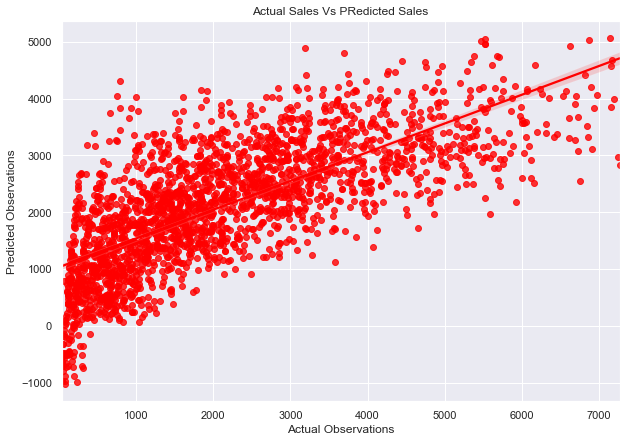

In [900]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
pred_lr = linear_model.predict(x_test)
print('-----------------Linear Regression--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(linear_model,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(linear_model,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

#### LASSO MODEL

-----------------Linear Regression--------------------
R2 Score :  0.5256273316796427
Training Score with Cross Validation :  0.49764693097531965
Mean Sqaured Error 1187998.6281301489
Root Mean  Sqaured Error 1089.9534981503334
Mean Absolute Error 831.3021656414138


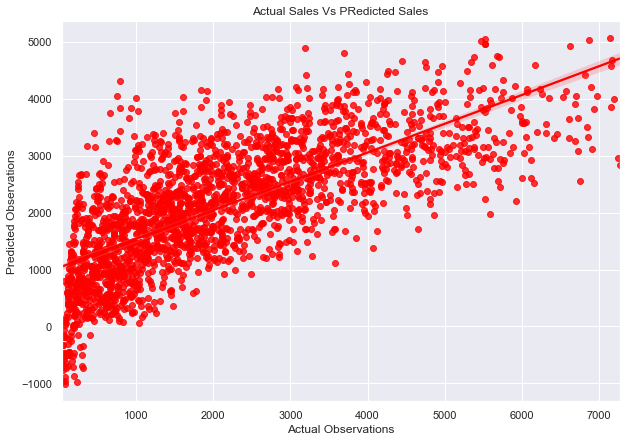

In [824]:
linear_model1 = Lasso()
linear_model1.fit(x_train,y_train)
pred_lr = linear_model1.predict(x_test)
print('-----------------Lasso Regression--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(linear_model1,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(linear_model1,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

#### RIDGE MODEL



-----------------Ridge Regression--------------------
R2 Score :  0.525763242121724
Training Score with Cross Validation :  0.4976473878239768
Mean Sqaured Error 1187658.2598300255
Root Mean  Sqaured Error 1089.797348056062
Mean Absolute Error 831.17872029061


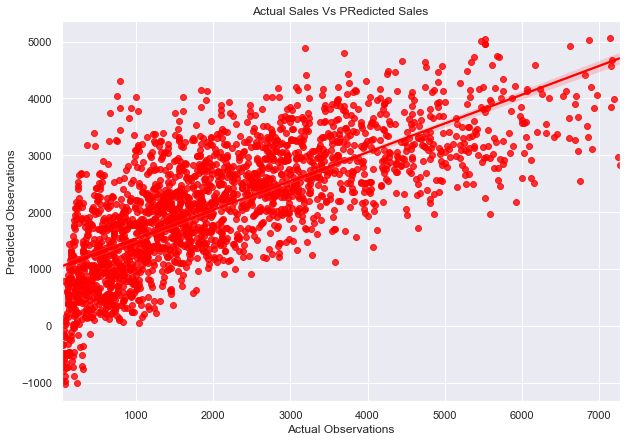

In [879]:
ridge = Ridge()
ridge.fit(x_train,y_train)
pred_lr = ridge.predict(x_test)
print('-----------------Ridge Regression--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(ridge,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(ridge,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

#### DECISION TREE REGRESSOR

In [826]:
params = {'criterion': ['mae','mse','friedman_mse'],
          'splitter': ['best','random'],
         # 'max_depth': range(5,11),
          'max_features':['log2','sqrt','auto',None],
          "max_leaf_nodes":[None,100,80,90] ,
         # "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]
         }

In [827]:
decisionTreeReg = DecisionTreeRegressor()
grid = GridSearchCV(decisionTreeReg,params,cv=5,scoring='r2')

In [828]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mae', 'mse', 'friedman_mse'],
                         'max_features': ['log2', 'sqrt', 'auto', None],
                         'max_leaf_nodes': [None, 100, 80, 90],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [829]:
grid.best_estimator_

DecisionTreeRegressor(max_features='auto', max_leaf_nodes=90, splitter='random')

-----------------Decision Tree-------------------
R2 Score :  0.5836961582931219
Training Score with Cross Validation :  0.5621075953304402
Mean Sqaured Error 1042573.5415664498
Root Mean  Sqaured Error 1021.0649056580339
Mean Absolute Error 716.661184302243


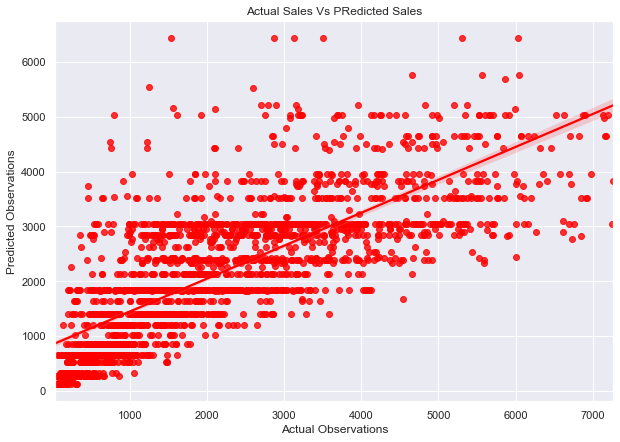

In [878]:
decisionTreeReg = DecisionTreeRegressor(max_features='auto', max_leaf_nodes=80, splitter='random')
decisionTreeReg.fit(x_train,y_train)
pred_lr = decisionTreeReg.predict(x_test)
print('-----------------Decision Tree-------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(decisionTreeReg,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(decisionTreeReg,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

#### RANDOM FOREST REGRESSOR

-----------------Random Forest--------------------
R2 Score :  0.569045849015932
Training Score with Cross Validation :  0.539821307558932
Mean Sqaured Error 1079263.1497274963
Root Mean  Sqaured Error 1038.875906799025
Mean Absolute Error 738.6245461825046


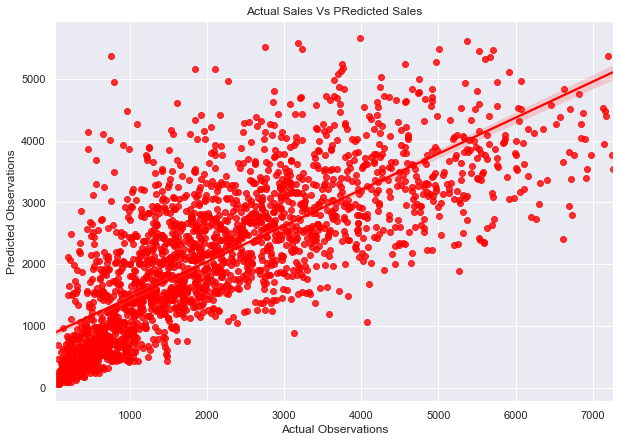

In [831]:
rf = RandomForestRegressor(n_estimators=400)
rf.fit(x_train,y_train)
pred_lr = rf.predict(x_test)
print('-----------------Random Forest--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(rf,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(rf,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

GRADIENT BOOSTING Regressor


----------------Gradientt Boosting Regressor--------------------
R2 Score :  0.6128584123923204
Training Score with Cross Validation :  0.5818267659249591
Mean Sqaured Error 969540.8392699633
Root Mean  Sqaured Error 984.652649044303
Mean Absolute Error 702.6714440388324


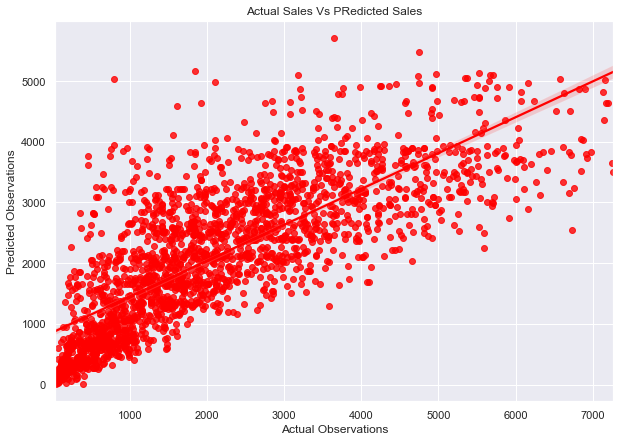

In [877]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_lr = gb.predict(x_test)
print('----------------Gradientt Boosting Regressor--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

XGBOOST REGRESSOR

-----------------XGB REGRESSOR--------------------
R2 Score :  0.5251851646404719
Training Score with Cross Validation :  0.5067642355260192
Mean Sqaured Error 1189105.9723576296
Root Mean  Sqaured Error 1090.4613575719359
Mean Absolute Error 784.043687655389


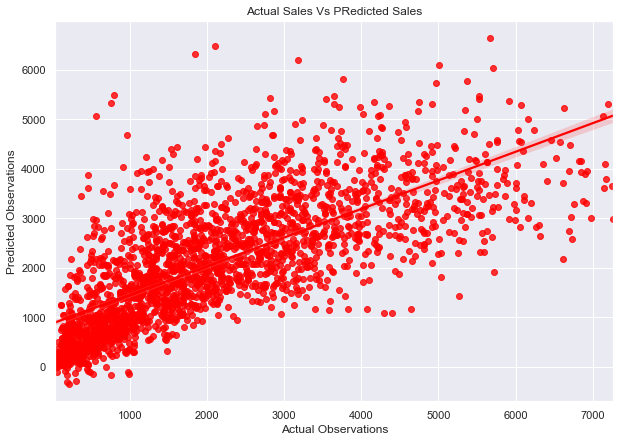

In [875]:
gb = XGBRegressor()
gb.fit(x_train,y_train)
pred_lr = gb.predict(x_test)
print('-----------------XGB REGRESSOR--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
cv_scores.append(np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

In [834]:
error = []
for i in range(0,7):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))
    

In [835]:
cv_scores

[0.4976460352288113,
 0.49764693097531965,
 0.4976473878239768,
 0.5590909680267394,
 0.5403430589105542,
 0.581592349758934,
 0.5067642355260192]

In [836]:
tab = {
    'R2 Score': r2_scores, 
    'CV Score': cv_scores, 
    'Error/Bias': error,
    'Mae Metric':mae_scores
}

In [837]:
table = pd.DataFrame(tab,index=['LinearReg','Lasso','Ridge'
                                ,'Decision Tree','Random Forest','Graidient Bossting','XGBOOST'])

In [838]:
table

R2 Score  CV Score  Error/Bias  Mae Metric
LinearReg           0.525771  0.497646    0.028125  831.173705
Lasso               0.525627  0.497647    0.027980  831.302166
Ridge               0.525763  0.497647    0.028116  831.178720
Decision Tree       0.587988  0.559091    0.028897  717.449065
Random Forest       0.569046  0.540343    0.028703  738.624546
Graidient Bossting  0.613005  0.581592    0.031413  702.547071
XGBOOST             0.525185  0.506764    0.018421  784.043688

#### we want to choose a model with less biass / less vairance. Graident Boosting has highest r2 aquare (least sum of differences between actual and observed predictions.)
#### As Error/ Bias is low for all the models , And MAE metrics is least for Graidetn Boosting/ XG Boost.

## HYPER PARAMETER TUNING GRADIENT BOOSTING

In [867]:
params_gb = {
    'loss': ['ls','lad','huber','quantile'], 'learning_rate': [0.1,1,.2,.01],
    'n_estimators': [200,100,150,50], 'criterion': ['mae','mse','friedman_mse']
}

In [868]:
gradient = GradientBoostingRegressor()
grid_g= RandomizedSearchCV(gradient,params_gb,n_iter=10,cv=3,scoring='r2',n_jobs=5)

In [869]:
grid_g.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=5,
                   param_distributions={'criterion': ['mae', 'mse',
                                                      'friedman_mse'],
                                        'learning_rate': [0.1, 1, 0.2, 0.01],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'n_estimators': [200, 100, 150, 50]},
                   scoring='r2')

In [870]:
grid_g.best_estimator_

GradientBoostingRegressor(loss='lad', n_estimators=150)

-----------------Graidient Boosting REGRESSOR--------------------
R2 Score :  0.6068565210287558
Training Score with Cross Validation :  0.5839671335173441
Mean Sqaured Error 984571.7193823179
Root Mean  Sqaured Error 992.2558739469965
Mean Absolute Error 700.3661515737789


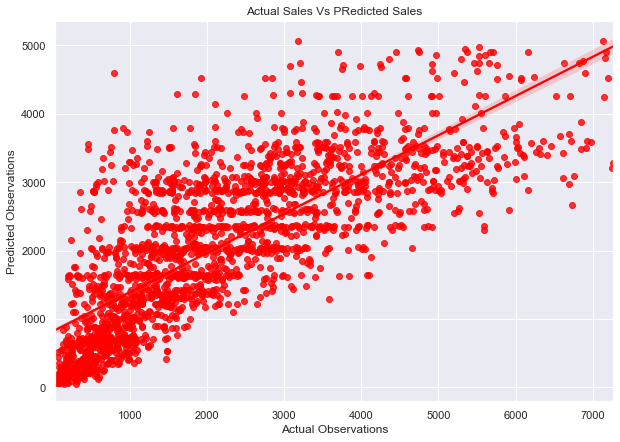

In [874]:
gb = GradientBoostingRegressor(loss='lad', n_estimators=150)
gb.fit(x_train,y_train)
pred_lr = gb.predict(x_test)
print('-----------------Graidient Boosting REGRESSOR--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
#r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
#cv_scores.append(np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
#mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

In [847]:
xgb= XGBRegressor(n_jobs=5)
params = {
    'learning_rate': [.01,.1,.2],'min_child_weight': [1,5,10],'gamma': [.5,.1,1.5,2,5],
    'subsample': [.6,.8,1.0],'n_estimators': [100,300,200,50]
}

In [848]:
grid = RandomizedSearchCV(xgb,params,n_iter=10,cv=5,scoring='r2')

In [849]:
grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=5,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                          

In [856]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=5, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

-----------------XGBOOST REGRESSOR--------------------
R2 Score :  0.602980078063807
Training Score with Cross Validation :  0.5774643757039991
Mean Sqaured Error 994279.7174014489
Root Mean  Sqaured Error 997.1357567560442
Mean Absolute Error 701.5524731947795


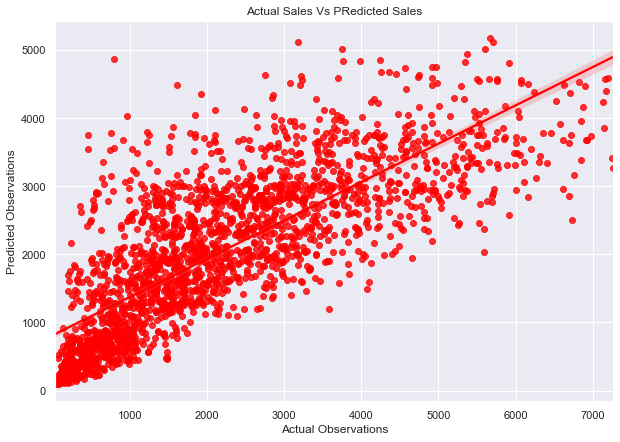

In [873]:
gb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=10,
             n_estimators=300, n_jobs=5, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)
gb.fit(x_train,y_train)
pred_lr = gb.predict(x_test)
print('-----------------XGBOOST REGRESSOR--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
#r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
#cv_scores.append(np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
#mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### EVALUATING THE MODEL : XGBOOST REGRESSOR

-----------------XGBOOST REGRESSOR--------------------
R2 Score :  0.6025979784041535
Training Score with Cross Validation :  0.5774902556613419
Mean Sqaured Error 995236.6314519241
Root Mean  Sqaured Error 997.6154727408372
Mean Absolute Error 701.3757738236152


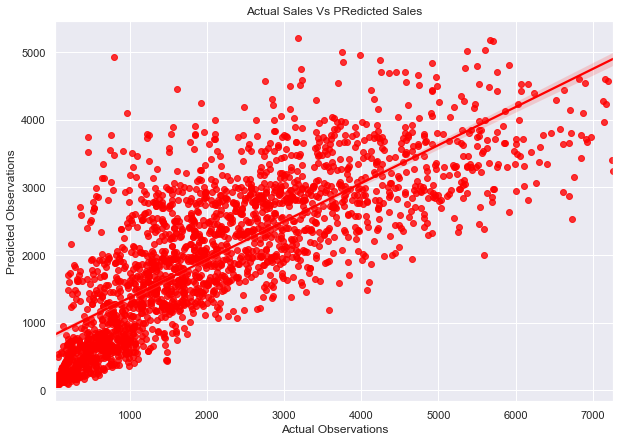

In [901]:
gb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=10,
             n_estimators=300, n_jobs=5, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)
gb.fit(x_train,y_train)
pred_lr = gb.predict(x_test)
print('-----------------XGBOOST REGRESSOR--------------------')
print('R2 Score : ',r2_score(y_test,pred_lr))
#r2_scores.append(r2_score(y_test,pred_lr))
print('Training Score with Cross Validation : ',np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
#cv_scores.append(np.mean(cross_val_score(gb,train1,y,cv=5,scoring='r2')))
print('Mean Sqaured Error',mean_squared_error(y_test,pred_lr))
#mae_scores.append(mean_absolute_error(y_test,pred_lr))
print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_lr)))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))

#plt.scatter(x_test, y_test,  color='gray')
plt.figure(figsize=(10,7))
sb.regplot(y_test, pred_lr, color='red')
plt.title('Actual Sales Vs PRedicted Sales')
plt.xlabel('Actual Observations')
plt.ylabel('Predicted Observations')
plt.show()

### TEST DATA PREDICTION

In [905]:
import joblib

In [906]:
joblib.dump(gb,'bigmart_gb.pk')

['bigmart_gb.pk']

In [907]:
model = joblib.load('bigmart_gb.pk')

In [908]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=5, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [909]:
test_prediction = model.predict(test)

In [910]:
test_dict = {
    'Item_Identifier': item_id, 'ITem_Outlet_Sales': test_prediction
}

In [911]:
test_pred = pd.DataFrame(test_dict)

In [914]:
test_pred.to_csv('predictions.csv')

In [915]:
test_pred

Item_Identifier  ITem_Outlet_Sales
0              FDW58        1597.021118
1              FDW14        1284.473999
2              NCN55         614.368164
3              FDQ58        2293.030762
4              FDY38        4337.725586
...              ...                ...
5676           FDB58        2102.069092
5677           FDD47        2566.106445
5678           NCO17        1805.548950
5679           FDJ26        3370.921387
5680           FDU37        1213.343384

[5681 rows x 2 columns]

THANKYOU